<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [122]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [123]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "1" #@param {type:"string"}
Student_ID_Name = "20214537 Tom Keane" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
#@markdown ---

In [124]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [125]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [126]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import seaborn as sns

In [128]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [129]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [130]:
!pip install gpy

In [131]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [132]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [133]:
def import_datasets(git_link = 'https://raw.githubusercontent.com/tomkeane07/AI-Projects-UL/Etivity3/semester3/MachineLearningApplications/E3/HousePrice_'):
  return {
      'Test'  : pd.read_csv(git_link+'Test.csv'),
      'Train' : pd.read_csv(git_link+'Train.csv')}
try:
  dbs
except:
  dbs = import_datasets()

dftest  =  dbs['Test' ]
dftrain =  dbs['Train']

In [134]:
display(dftrain.tail())

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
1633,1634,12424903,Blackrock,1,2,C2,Built in c.1930 38 Stradbrook Road is a deligh...,"Parking,Gas Fired Central Heating,Alarm,Wheelc...",Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,bungalow,64.00,500000
1634,1635,12383142,Blackrock,3,5,C1,An impressive three-story family home superbly...,NaN,Gas fired central heating with underfloor heat...,53.284975,-6.178685,detached,175.96,795000
1635,1636,12426975,Lucan,2,3,A3,DNG Lucan's leading estate agents are delighte...,NaN,None,53.351667,-6.435278,semi-detached,98.00,340000
1636,1637,12198921,Sandymount,8,8,D2,Holyrood Castle is a most distinctive 19th cen...,NaN,None,53.328997,-6.221030,detached,507.00,2500000
1637,1638,12314237,Shankill,2,2,E1,A superb opportunity awaits to acquire this be...,NaN,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,semi-detached,50.00,370000


In [135]:
display(dftest.tail())

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
697,2336,12392566,Kilmainham,1,1,G,Sherry FitzGerald is delighted to present 56 B...,NaN,Secure gated and well maintained development\n...,53.343377,-6.296654,apartment,40.0
698,2337,12352487,Stoneybatter,1,2,D2,26 Viking Road is a well presented and moderni...,NaN,Well presented and modernised extended two bed...,53.351074,-6.285557,terraced,57.0
699,2338,12387290,Cabinteely,1,3,D1,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....,"Parking,Gas Fired Central Heating",None,53.261710,-6.164979,semi-detached,93.0
700,2339,12382807,Clontarf,2,3,NaN,DNG are delighted to represent the sale of 109...,NaN,Gas fired central heating.\nFully renovated an...,53.360515,-6.189661,terraced,118.0
701,2340,12393769,Glenageary,1,3,F,This is an instantly appealing Jennings built ...,NaN,Drenched in natural light\nSuperb blank canvas...,53.280408,-6.132925,semi-detached,122.0


In [136]:
display(dftrain.describe())

print("\n\nmissing values _ %")
print(dftrain.isna().sum()* 100 / len(dftrain))
print("_________\nunique values")
print(dftrain.nunique(axis=0))

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06




missing values _ %
Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64
_________
unique values
Index            1638
ID               1638
Location          142
Num_Bathrooms      11
Num_Beds           11
BER_class          16
Description      1638
Services           31
Features         1118
Latitude         1604
Longitude        1605
Type               10
Surface           666
Price             267
dtype: int64


In [137]:
dropcols = ['Services', 'Index', 'ID']

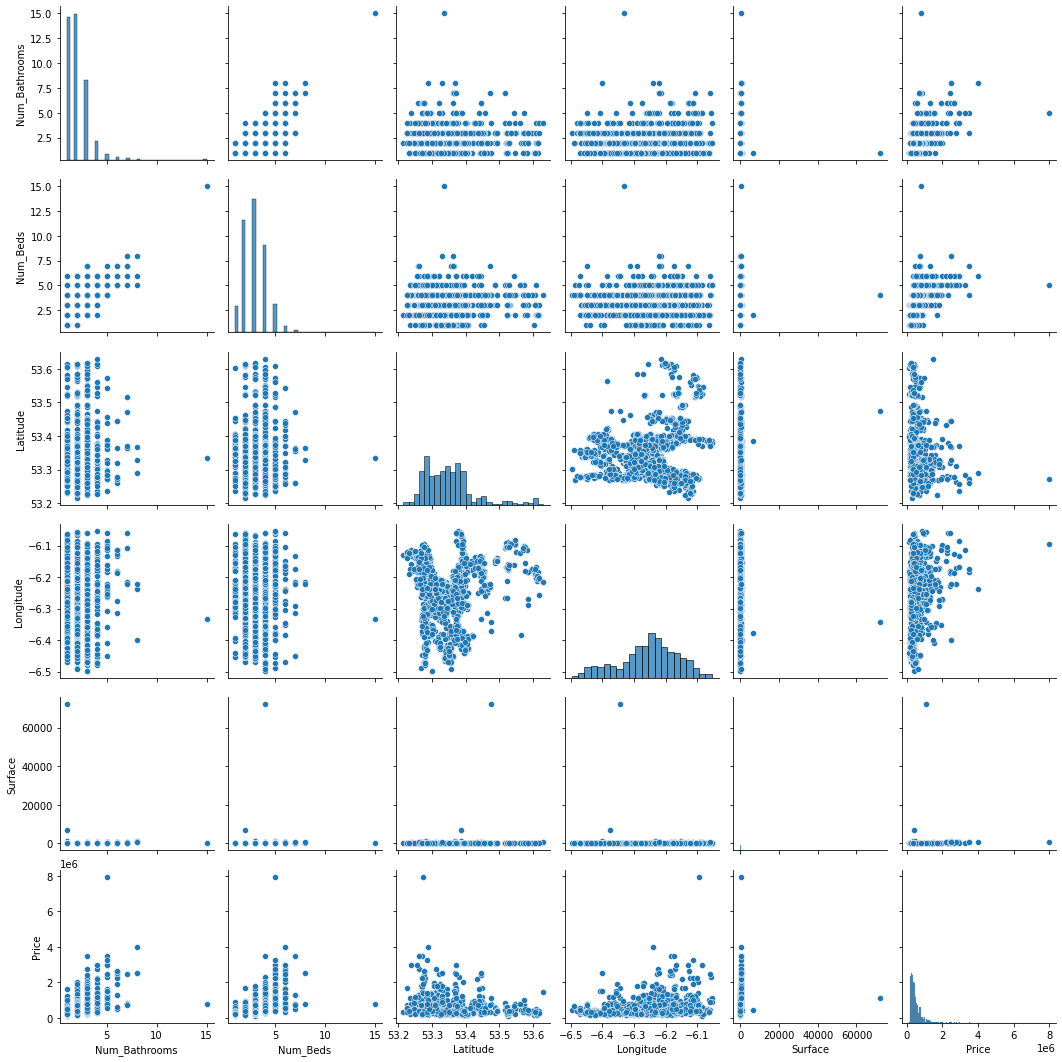

,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [138]:
def inspect_data(df, dropcols):
  df = df.drop(df[dropcols], axis=1)

  sns.pairplot(data=df.dropna())
  plt.show()

  display(df.describe())
  
inspect_data(dftrain, dropcols)

In [146]:
def print_text_col_examples(df):
  cols = df[['Description', 'Features']].notna()
  print("description")
  print(df[['Description']][cols].tail(5).values, end='\n\n')

  print('features')
  print(df[['Features']][cols].tail(5).values, end="\n\n")
print_text_col_examples(dftrain)

description
[['Built in c.1930 38 Stradbrook Road is a delightful, 2-bedroom double fronted cottage of immense charm and character. The property has been tastefully upgraded by the present owner with no expense spared as a result the property comes to the market in walk-in condition. Viewing is highly recommended. The accommodation briefly comprises, hall, living room / kitchen, 2 bedrooms and large bathroom. Front garden with off street parking, extremely private low maintenance walled rear garden with garden shed.\n\nThe bustling town of Blackrock which needs no introduction is located just a short distance away with a host of speciality shops, restaurants and cafes. The DART at Seapoint and Blackrock are minutes away. The area is also very well serviced with several bus routes within close proximity, offering easy access to and from the city centre.']
 ["An impressive three-story family home superbly located Off Newtownpark Avenue in an area of utmost convenience this property consi

## Training & Test Data

In [139]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

NameError: ignored

### Train dataset

In [ ]:
# training dataset: 
training_file = syntPath+filename1
# test dataset: 
testing_file = syntPath+filename2
# cost dataset: 
cost_file = syntPath+filename3

In [ ]:
# show first data frame rows 
dftrain.head()

In [ ]:
# Generate descriptive statistics
dftrain.describe()

### Test dataset

In [ ]:
# show first data frame rows 
dftest.head()

In [ ]:
# Generate descriptive statistics
dftest.describe()

### Expected Cost dataset

In [ ]:
# Generate descriptive statistics
dfcost.describe()

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.